In [1]:
# Load packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from pandas import concat
from matplotlib.pyplot import subplots
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, lasso_path, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
########################################### DATA MANIPULATION #################################################

In [3]:
# Import dataset
data = pd.read_stata("final_fl2.dta")

# Convert Categorical variables: List of categorical columns
categorical_cols = ['race','sex','custody_description','county1']

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    data[col+ '_encoded'] = le.fit_transform(data[col])
    
# Select columns
data = data.select_dtypes(include=['number'])

# Removing missing observations
data = data.dropna()
data.shape

(129531, 90)

In [4]:
# Define variables
X = data.drop(columns = ["anyrecid","distn3","distn4","finrecidany","nonfinrecidany",'income'])
Y = data["anyrecid"]

# Print the column heads
print(X.columns)

Index(['level_0', 'index', 'date', 'adate', 'rdate', 'releaseyear',
       'releasemonth', 'after', 'dist', 'distnoab', 'distn2', 'fullbanafter',
       'fullbanbefore', 'concurrent_sentence', 'drugoffense', 'traffoffense',
       'otheroffense', 'smd', 'traffmar', 'traffcoc', 'traffher', 'traffamph',
       'traffill', 'traffconspir', 'fincrime', 'notpossoffense',
       'drugoffense_noselling', 'drugoffense_poss', 'violentcrime', 'assault',
       'elderly', 'escape', 'forgery', 'fraud', 'kidnap', 'manslaughter',
       'murder', 'othercrime', 'otherviolent', 'propdamage', 'racketeer',
       'robbery', 'sexcrime', 'propsteal', 'weapon', 'criminalmischief', 'dui',
       'licrevoke', 'fleeorescape', 'fraudforge', 'anytheft', 'anyburg',
       'propcrime', 'birthyear', 'maxdate', 'maxadate', 'maxrdate', 'dateorig',
       'offenseyear', 'offensemonth', 'ban', 'age', 'under30', 'black', 'male',
       'totalyearssentenced', 'prioroffensenumber', 'prioroffense',
       'countoffenses', 

In [5]:
######################################## OLS REGRESSION #####################################################

In [6]:
# Fit OLS
model = sm.OLS(Y,X).fit()

In [7]:
# Latex Output
latex_output = model.summary().as_latex()
print(latex_output)

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                &     anyrecid     & \textbf{  R-squared:         } &     0.201   \\
\textbf{Model:}                        &       OLS        & \textbf{  Adj. R-squared:    } &     0.200   \\
\textbf{Method:}                       &  Least Squares   & \textbf{  F-statistic:       } &     570.2   \\
\textbf{Date:}                         & Fri, 20 Dec 2024 & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}                         &     20:01:08     & \textbf{  Log-Likelihood:    } &   -75160.   \\
\textbf{No. Observations:}             &      129531      & \textbf{  AIC:               } & 1.504e+05   \\
\textbf{Df Residuals:}                 &      129473      & \textbf{  BIC:               } & 1.510e+05   \\
\textbf{Df Model:}                     &          57      & \textbf{                     } &             \\
\textbf{Covariance Type:}              &    nonrobust     & \textbf{                     }

In [8]:
################################# RIDGE REGRESSION ###############################################################

In [9]:
# Load packages 
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error as mse

In [10]:
# Standardized the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
import warnings

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Set up a range of lambdas
    lambdas = 10**np.linspace(5, -5, 100) / Y.std()
    soln_array = skl.ElasticNet.path(X_scaled,
                                     Y,
                                     l1_ratio=0,
                                     alphas=lambdas)[1]
    print(soln_array.shape)

(84, 100)


In [12]:
# Transform Soln_path into a dataframe
soln_path = pd.DataFrame(soln_array.T,
                         columns=X.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,level_0,index,date,adate,rdate,releaseyear,releasemonth,after,dist,distnoab,...,unemp_rate,year_y,lincome,year,month_y,percentage_snap_recipients,race_encoded,sex_encoded,custody_description_encoded,county1_encoded
negative log(lambda),,,,,,,,,,,,,,,,,,,,,
-12.239637,-2.172417e-09,-2.172417e-09,-7.088633e-07,-7.899801e-07,-8.088146e-07,-8.073586e-07,1.855850e-09,-1.560123e-07,-7.109032e-07,-7.088633e-07,...,-4.122369e-07,-8.073586e-07,-3.510545e-07,-8.073586e-07,1.855850e-09,-7.588481e-07,-3.429147e-07,2.490407e-07,6.039662e-08,-4.676608e-09
-12.007053,-2.741263e-09,-2.741263e-09,-8.944647e-07,-9.968223e-07,-1.020589e-06,-1.018752e-06,2.341490e-09,-1.968592e-07,-8.970388e-07,-8.944647e-07,...,-5.201728e-07,-1.018752e-06,-4.429712e-07,-1.018752e-06,2.341490e-09,-9.575399e-07,-4.327054e-07,3.142517e-07,7.621126e-08,-5.900651e-09
-11.774469,-3.459054e-09,-3.459054e-09,-1.128656e-06,-1.257816e-06,-1.287806e-06,-1.285488e-06,2.954104e-09,-2.483985e-07,-1.131904e-06,-1.128656e-06,...,-6.563659e-07,-1.285488e-06,-5.589514e-07,-1.285488e-06,2.954104e-09,-1.208250e-06,-5.460063e-07,3.965375e-07,9.616670e-08,-7.444887e-09
-11.541884,-4.364788e-09,-4.364788e-09,-1.424153e-06,-1.587134e-06,-1.624978e-06,-1.622052e-06,3.726828e-09,-3.134280e-07,-1.428252e-06,-1.424153e-06,...,-8.282115e-07,-1.622052e-06,-7.052930e-07,-1.622052e-06,3.726828e-09,-1.524594e-06,-6.889722e-07,5.003686e-07,1.213470e-07,-9.392965e-09
-11.309300,-5.507670e-09,-5.507670e-09,-1.797000e-06,-2.002658e-06,-2.050411e-06,-2.046719e-06,4.701403e-09,-3.954768e-07,-1.802171e-06,-1.797000e-06,...,-1.045039e-06,-2.046719e-06,-8.899411e-07,-2.046719e-06,4.701403e-09,-1.923747e-06,-8.693690e-07,6.313856e-07,1.531200e-07,-1.185032e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.855876,-4.259642e-04,-4.254958e-04,8.534165e-03,-1.157748e-01,-1.002916e-01,6.122189e-02,2.859584e-03,1.087627e-03,7.155866e-03,4.537341e-02,...,1.496271e-02,8.655230e-03,-7.427179e-03,-9.063092e-04,1.257519e-03,-4.118610e-02,-7.989319e-03,1.244025e-02,2.065152e-03,2.983632e-03
10.088461,-4.260638e-04,-4.255176e-04,4.632966e-03,-1.165260e-01,-1.083981e-01,7.082407e-02,3.370319e-03,1.034566e-03,5.534114e-03,4.477711e-02,...,1.495950e-02,9.832555e-03,-7.428573e-03,-4.928268e-04,1.397270e-03,-4.117963e-02,-7.953269e-03,1.245630e-02,2.064899e-03,2.982569e-03
10.321045,-4.261715e-04,-4.255374e-04,6.302873e-04,-1.171620e-01,-1.166428e-01,8.081567e-02,3.907492e-03,9.865076e-04,4.052046e-03,4.392476e-02,...,1.495700e-02,1.089884e-02,-7.429723e-03,-1.407429e-04,1.524582e-03,-4.117455e-02,-7.921271e-03,1.246586e-02,2.064611e-03,2.981604e-03


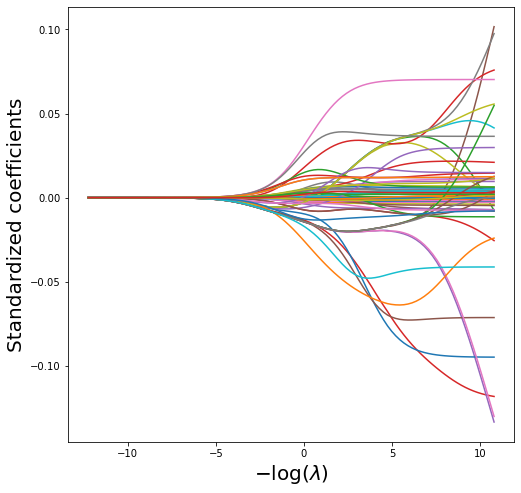

In [13]:
# Plot the graph
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
#ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.005))
#ax.set_title('Ridge Regression Coefficient Path', fontsize=21); 
plt.savefig('ridge_final.png', format = 'png', dpi=300, bbox_inches='tight')
#ax.set_ylim([-0.1,0.4]);

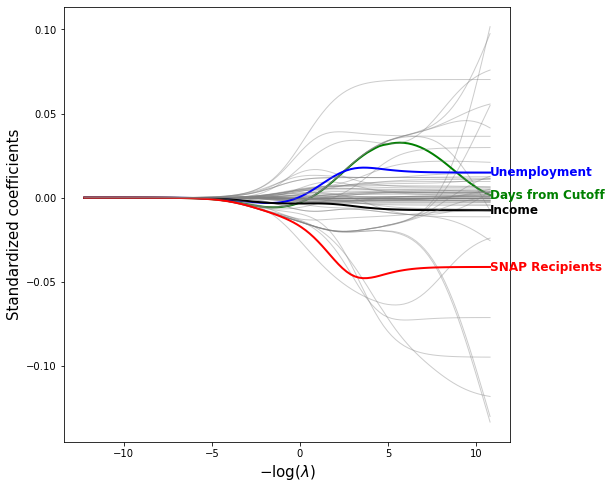

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 8))

# Plot all the coefficient paths
soln_path.plot(ax=ax, legend=False)

# List of variables you want to highlight with their specific colors and custom labels
highlight_vars = {
    'lincome': ('black', 'Income'),
    'unemp_rate': ('blue', 'Unemployment'),
    'dist': ('green', 'Days from Cutoff'),
    'percentage_snap_recipients': ('red', 'SNAP Recipients')
}

# Iterate over the plotted lines
for i, line in enumerate(ax.get_lines()):
    var_name = soln_path.columns[i]  
    
    # Check if the current variable is one to highlight
    if var_name in highlight_vars:
        color, label = highlight_vars[var_name] 
        line.set_color(color)  
        line.set_linewidth(2)  

        # Annotate the line 
        x_data = line.get_xdata()[-1] 
        y_data = line.get_ydata()[-1]  
        ax.text(x_data, y_data, label, color=color, fontsize=12, fontweight='bold',
                verticalalignment='center', horizontalalignment='left')  
    else:
        # Fade the other variables
        line.set_color(to_rgba('gray', alpha=0.4))  
        line.set_linewidth(1)  

# Set labels and title
ax.set_xlabel('$-\log(\lambda)$', fontsize=15)
ax.set_ylabel('Standardized coefficients', fontsize=15)
#ax.set_title('Ridge Regression Coefficient Path', fontsize=21)
ax.legend().set_visible(False)

# save the figure
plt.savefig('ridge_faded.png', format='png', dpi=300, bbox_inches='tight')

plt.show();

In [15]:
# Ridge cross-validation plot
# Set up cross validation
K = 5
kfold = KFold(n_splits = K, random_state=0, shuffle=True)

In [16]:
import warnings

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Perform RidgeCV with different alpha (lambda) values
    ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                               l1_ratio=0,
                               cv=kfold)
    pipeCV = Pipeline(steps=[('scaler', scaler),
                             ('ridge', ridgeCV)])
    print(pipeCV.fit(X, Y))

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.06826854e+05, 1.63906745e+05, 1.29893292e+05, 1.02938213e+05,
       8.15767731e+04, 6.46481976e+04, 5.12325910e+04, 4.06009522e+04,
       3.21755603e+04, 2.54985813e+04, 2.02071896e+04, 1.60138522e+04,
       1.26907040e+04, 1.00571659e+04, 7.97013196e+03, 6.31619328e+03,
       5.00547516e+03, 3.96675346e+03,...
       1.71711288e-03, 1.36078259e-03, 1.07839693e-03, 8.54611126e-04,
       6.77264702e-04, 5.36720694e-04, 4.25341971e-04, 3.37076238e-04,
       2.67127154e-04, 2.11693701e-04, 1.67763638e-04, 1.32949814e-04,
       1.05360454e-04, 8.34963580e-05, 6.61694358e-05, 5.24381462e-05,
       4.15563341e-05, 3.29326841e-05, 2.60985890e-05, 2.06826854e-05]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])


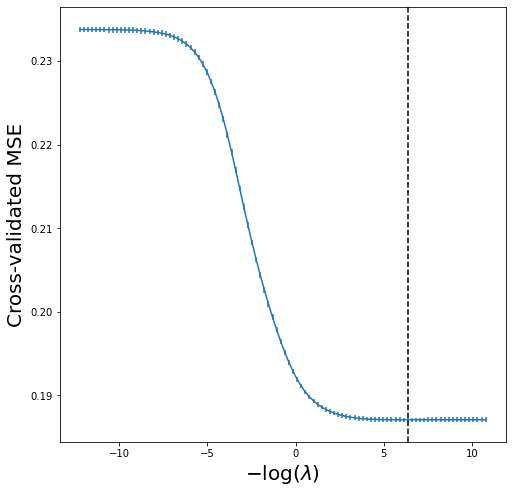

In [17]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [18]:
###################################### LASSO REGRESSION #########################################################

In [19]:
# Lasso
import warnings
import matplotlib.pyplot as plt

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    lassoCV = skl.ElasticNetCV(n_alphas=200, l1_ratio=1, cv=kfold)
    pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
    pipeCV.fit(X, Y)  
    tuned_lasso = pipeCV.named_steps['lasso']
    best_alpha = tuned_lasso.alpha_

In [20]:
# Compute Lasso path
#lambdas, soln_array = lasso_path(X_scaled, Y.values.ravel(), alphas=np.logspace(-4, 4, 100))[:2]

lambdas, soln_array = lasso_path(X_scaled, Y, 
                                 alphas=np.logspace(-4, 4, 100), 
                                 max_iter=10000)[:2]
soln_path = pd.DataFrame(soln_array.T, 
                         columns=X.columns, 
                         index=-np.log(lambdas))
soln_path

,level_0,index,date,adate,rdate,releaseyear,releasemonth,after,dist,distnoab,...,unemp_rate,year_y,lincome,year,month_y,percentage_snap_recipients,race_encoded,sex_encoded,custody_description_encoded,county1_encoded
-9.210340,-0.000000,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,0.0,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.000000,0.000000,-0.000000
-9.024273,-0.000000,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,0.0,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.000000,0.000000,-0.000000
-8.838205,-0.000000,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,0.0,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.000000,0.000000,-0.000000
-8.652138,-0.000000,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,0.0,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.000000,0.000000,-0.000000
-8.466070,-0.000000,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,0.0,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.0,-0.000000,-0.000000,0.000000,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.466070,-0.000643,-5.485503e-20,0.0,-0.078238,-0.085374,-0.0,0.0,0.001567,0.002636,0.075907,...,0.015556,-0.0,-0.007064,-0.0,0.0,-0.043357,-0.006769,0.000012,0.001850,0.002910
8.652138,-0.000679,-3.976990e-18,0.0,-0.079357,-0.085453,-0.0,0.0,0.001471,0.002999,0.076473,...,0.015444,-0.0,-0.007121,-0.0,0.0,-0.042943,-0.006841,0.000013,0.001887,0.002927
8.838205,-0.000709,-1.727934e-18,0.0,-0.080275,-0.085516,-0.0,0.0,0.001394,0.003330,0.076914,...,0.015352,-0.0,-0.007168,-0.0,0.0,-0.042604,-0.006911,0.000007,0.001917,0.002942
9.024273,-0.000733,-0.000000e+00,0.0,-0.081032,-0.085557,-0.0,0.0,0.001332,0.003658,0.077242,...,0.015276,-0.0,-0.007207,-0.0,0.0,-0.042324,-0.007021,0.000000,0.001942,0.002955


/var/folders/1x/fvyxnz7d5db2mw8jz8k69snr0000gn/T/ipykernel_48306/2188380166.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


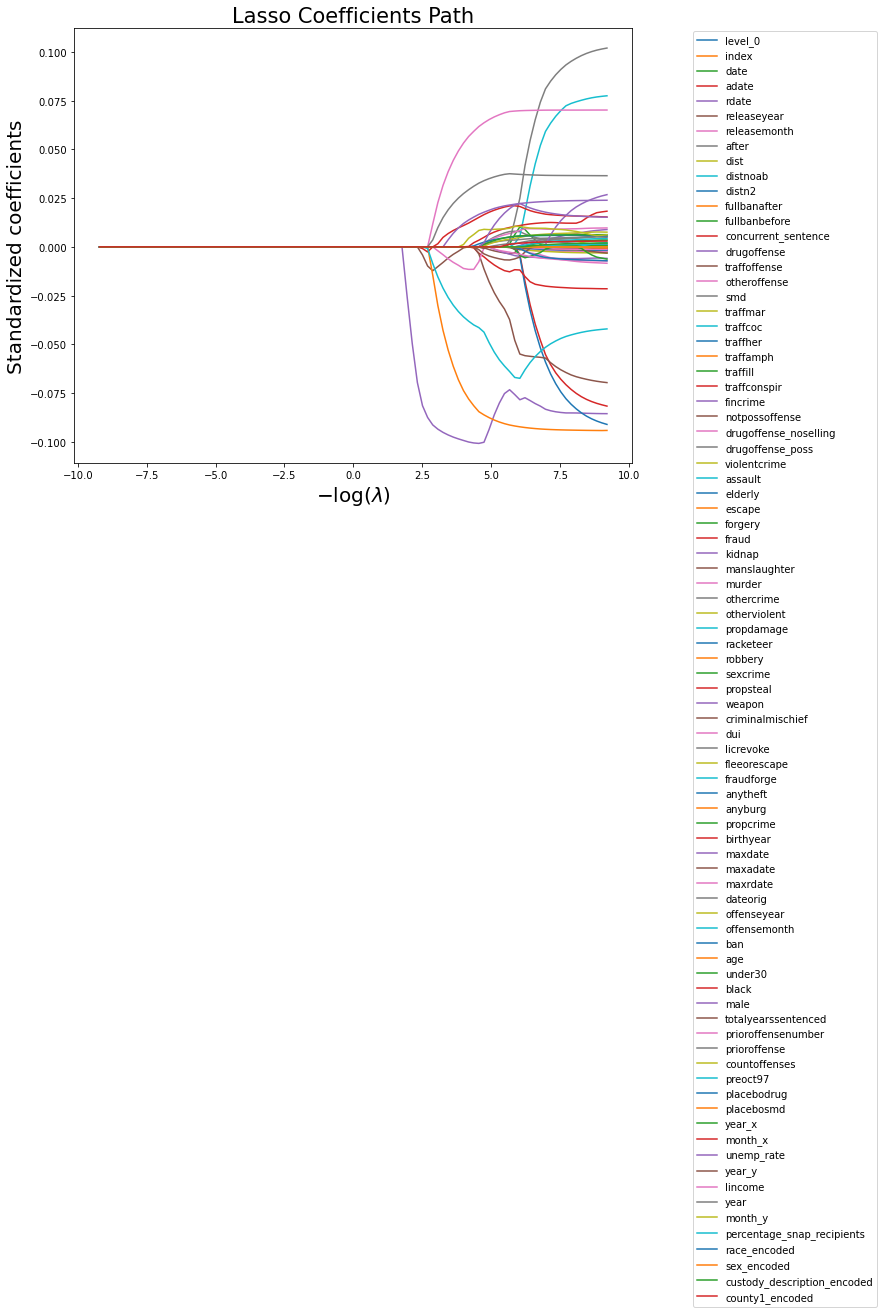

In [21]:
# Plot the solution path
plt.figure(figsize=(10, 8))
ax = plt.gca()

for column in soln_path.columns:
    ax.plot(soln_path.index.to_numpy(), soln_path[column].to_numpy(), label=column) 

ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.set_title('Lasso Coefficients Path', fontsize=21)
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.005))
plt.tight_layout()  
plt.show();

In [22]:
# Cross validation MSE
import warnings

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    lassoCV = skl.ElasticNetCV(n_alphas=100,
                               l1_ratio=1,
                               cv=kfold)
    pipeCV = Pipeline(steps=[('scaler', scaler),
                             ('lasso', lassoCV)])
    pipeCV.fit(X, Y)
    tuned_lasso = pipeCV.named_steps['lasso']
    tuned_lasso.alpha_

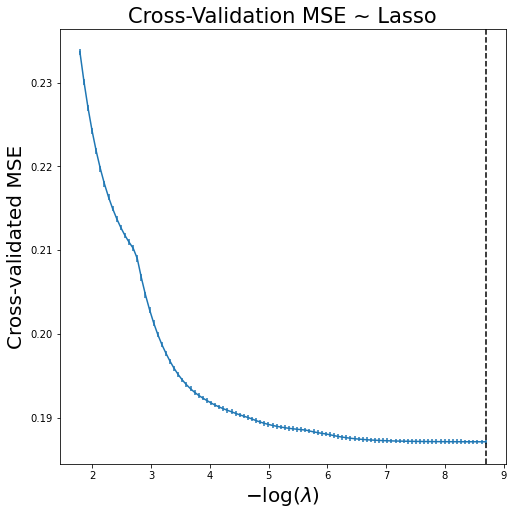

In [23]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_title('Cross-Validation MSE ~ Lasso', fontsize =21);

In [24]:
############################################## CLASSIFICATION TREE ################################################

In [25]:
# Load packages
import sklearn.model_selection as skm
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR,
      GradientBoostingClassifier as GBC,
     RandomForestClassifier as RFC)

In [26]:
# classification Tree
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)
clf.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [27]:
# Accuracy
print('Accuracy score:',accuracy_score(Y, clf.predict(X)))

# Residual value
resid_dev = np.sum(log_loss(Y, clf.predict_proba(X)))
print('Residual value:',resid_dev)

Accuracy score: 0.6744177069581799
Residual value: 0.5810712818689788


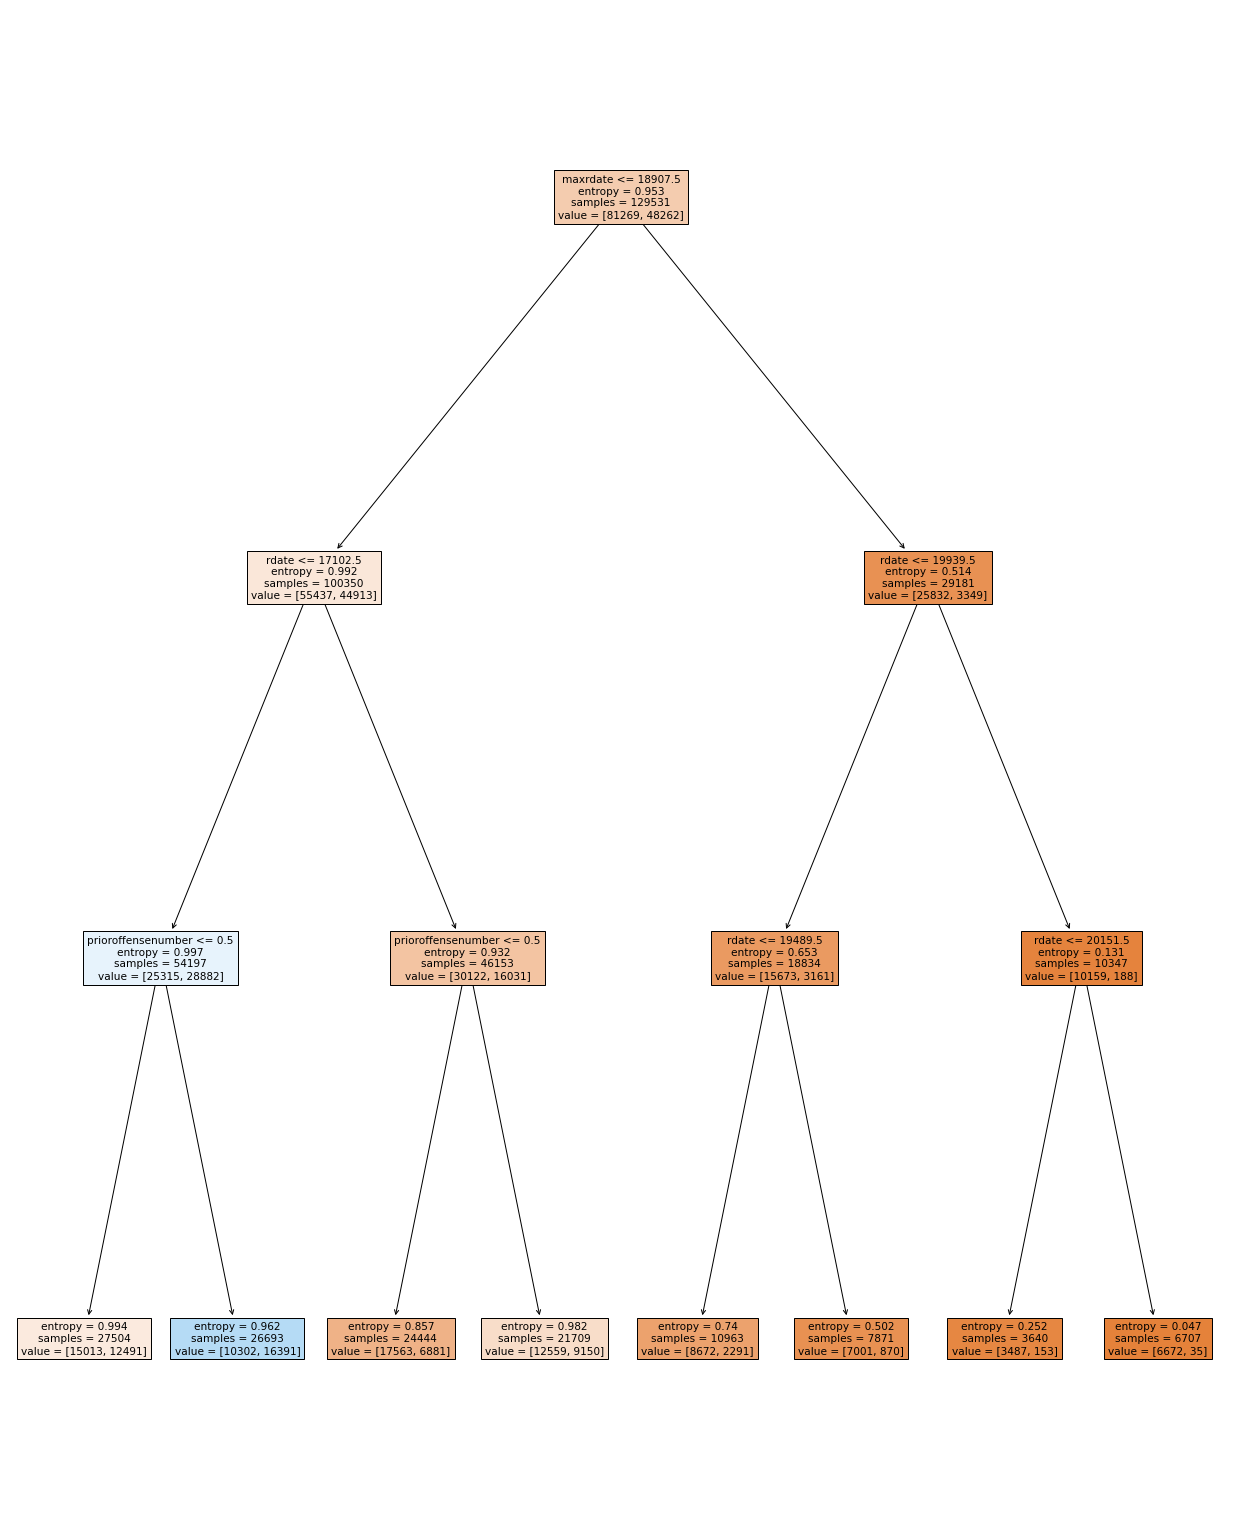

In [28]:
# Plot the tree
feature_names = X.columns
ax = subplots(figsize=(22,28))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax, filled = True);

In [29]:
# Convert feature_names (pandas Index) to a list
feature_names = feature_names.tolist()

# Print the decision tree rules
tree_rules = export_text(clf, feature_names=feature_names, show_weights=True)
print(tree_rules)

|--- maxrdate <= 18907.50
|   |--- rdate <= 17102.50
|   |   |--- prioroffensenumber <= 0.50
|   |   |   |--- weights: [15013.00, 12491.00] class: 0.0
|   |   |--- prioroffensenumber >  0.50
|   |   |   |--- weights: [10302.00, 16391.00] class: 1.0
|   |--- rdate >  17102.50
|   |   |--- prioroffensenumber <= 0.50
|   |   |   |--- weights: [17563.00, 6881.00] class: 0.0
|   |   |--- prioroffensenumber >  0.50
|   |   |   |--- weights: [12559.00, 9150.00] class: 0.0
|--- maxrdate >  18907.50
|   |--- rdate <= 19939.50
|   |   |--- rdate <= 19489.50
|   |   |   |--- weights: [8672.00, 2291.00] class: 0.0
|   |   |--- rdate >  19489.50
|   |   |   |--- weights: [7001.00, 870.00] class: 0.0
|   |--- rdate >  19939.50
|   |   |--- rdate <= 20151.50
|   |   |   |--- weights: [3487.00, 153.00] class: 0.0
|   |   |--- rdate >  20151.50
|   |   |   |--- weights: [6672.00, 35.00] class: 0.0



In [30]:
# Pruning Classification Tree
# Load the packages
import sklearn.model_selection as skm
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR,
     RandomForestClassifier as RFC)

In [31]:
# Split the data between train and text
(X_train,
 X_test,
 Y_train,
 Y_test) = skm.train_test_split(X,
                               Y,
                                test_size=0.3,
                                random_state=0)

# Accuracy score
clf1 = DTC(criterion='entropy', random_state=0)
clf1.fit(X_train, Y_train)
accuracy_score(Y_test, clf.predict(X_test))

0.674704065877509

In [32]:
ccp_path = clf.cost_complexity_pruning_path(X_train, Y_train)
kfold1 = skm.KFold(10,
                  random_state=1,
                  shuffle=True)

grid = skm.GridSearchCV(clf1,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold1,
                        scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_score_

0.6982829875656346

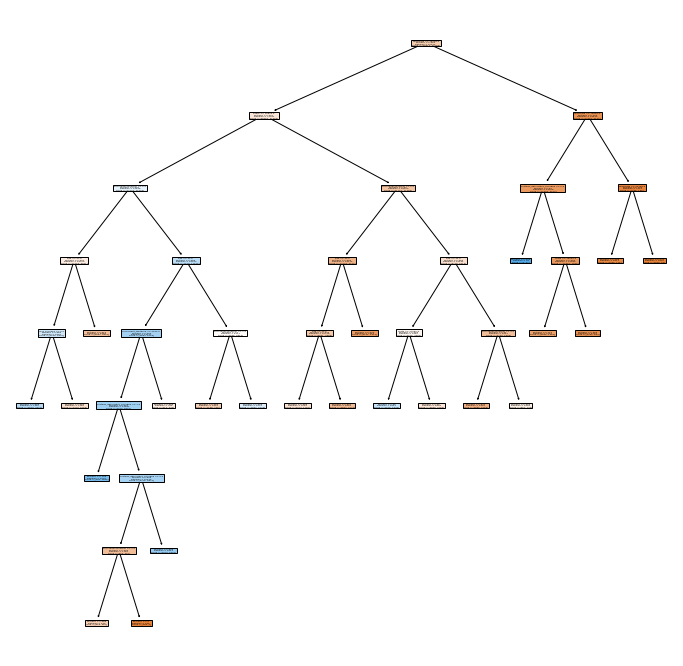

In [33]:
# Plot the pruned tree
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax, filled=True);

In [34]:
###################################### BAGGING AND RANDOM FOREST ####################################################

In [35]:
# Building the forest
data_RF = RFC(max_features = X_train.shape[1], random_state=0)
data_RF.fit(X_train,Y_train)

RandomForestClassifier(max_features=84, random_state=0)

In [36]:
# Table importance
feature_imp = pd.DataFrame(
    {'importance':data_RF.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
rdate,0.086171
maxrdate,0.081360
age,0.065387
lincome,0.050155
maxdate,0.047501
...,...
traffher,0.000000
traffamph,0.000000
traffill,0.000000
traffconspir,0.000000


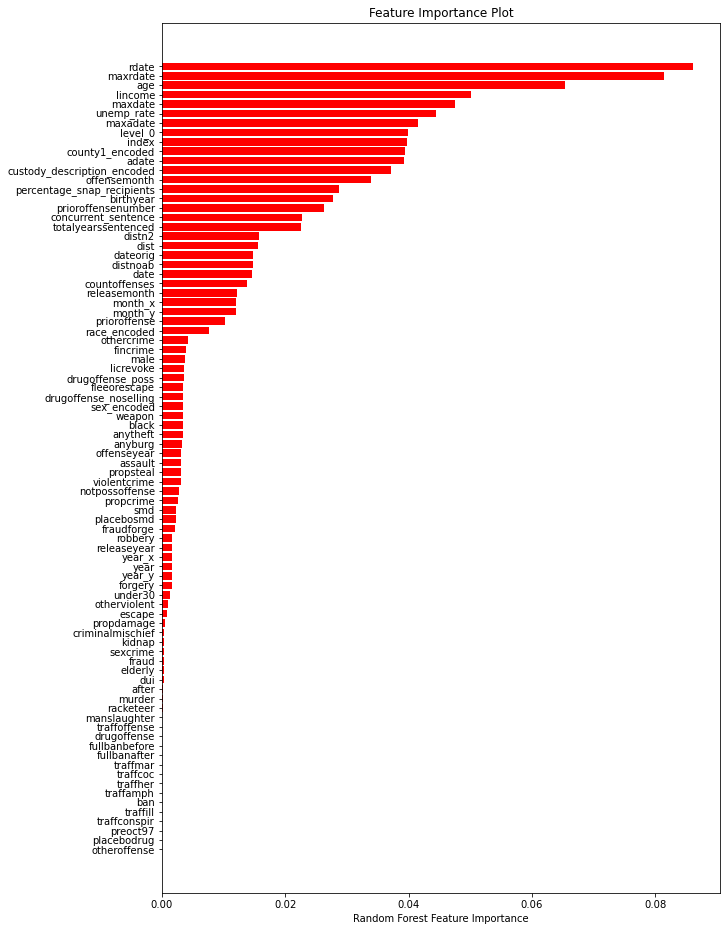

In [37]:
# Plot variable importance
importance = data_RF.feature_importances_
sorted_importance = importance.argsort()

plt.figure(figsize=(10, 16))
plt.barh(X.columns[sorted_importance], importance[sorted_importance],color = 'red')
plt.xlabel('Random Forest Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

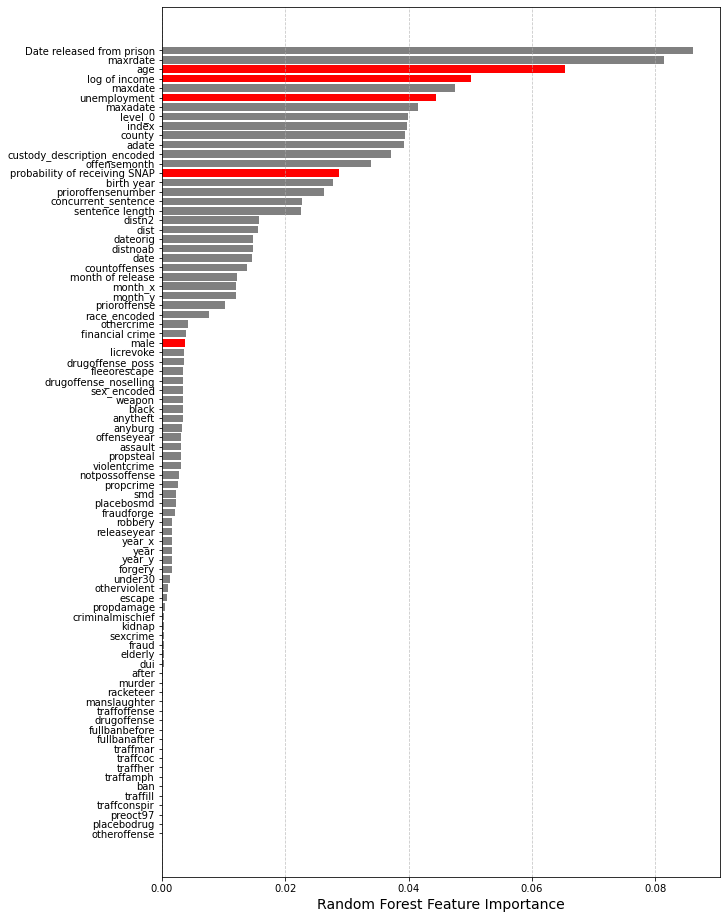

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_RF is your fitted Random Forest model and X is your feature DataFrame
importance2 = data_RF.feature_importances_
sorted_importance2 = np.argsort(importance2)

# Create a DataFrame for better handling
feature_importance_df2 = pd.DataFrame({
    'Feature': X.columns[sorted_importance2],
    'Importance': importance[sorted_importance2]
})
# Dictionary for renaming multiple variables
rename_dict = {
    'unemp_rate': 'unemployment',
    'totalyearssentenced': 'sentence length',  
    'fincrime': 'financial crime',
    'priooffensenumber':'number of prior offenses',
    'birthyear': 'birth year',
    'county1_encoded':'county',
    'releasemonth': 'month of release',
    'rdate':'Date released from prison',
    'lincome':'log of income',
    'percentage_snap_recipients':'probability of receiving SNAP'
}
# Change 'unemp_rate' to 'employment'
feature_importance_df2['Feature'] = feature_importance_df2['Feature'].replace(rename_dict)

# Highlighted features
highlighted_features = ['age', 'unemployment','male', 'log of income','probability of receiving SNAP']

# Create a color array: Use a bright color for highlighted features and grey for others
colors = ['red' if feature in highlighted_features else 'grey' for feature in feature_importance_df2['Feature']]

plt.figure(figsize=(10, 16))
plt.barh(feature_importance_df2['Feature'], feature_importance_df2['Importance'], color=colors)
plt.xlabel('Random Forest Feature Importance', fontsize=14)
#plt.title('Feature Importance Plot', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.savefig('importance.png', format='png', dpi=300, bbox_inches='tight')
plt.show();

In [39]:
############################################ SUMMARY STATISTICS ###################################################

In [40]:
# Adjusting column names to match the dataset and re-running the analysis
columns_of_interest = [ 'income', 'percentage_snap_recipients', 'anyrecid']

# Filtering the dataset for the relevant columns and grouping by 'anyrecid'
summary_stats = data[columns_of_interest].groupby('anyrecid').describe()

# Display the summary statistics
print(summary_stats)

           income                                                        \
            count          mean          std      min      25%      50%   
anyrecid                                                                  
0.0       81269.0  43970.506048  5890.209282  24031.0  40589.0  44186.0   
1.0       48262.0  42110.100141  5792.292067  23852.0  38457.0  42311.0   

                           percentage_snap_recipients                      \
              75%      max                      count      mean       std   
anyrecid                                                                    
0.0       47876.0  67967.0                    81269.0  0.262735  0.118334   
1.0       45995.0  61379.0                    48262.0  0.185716  0.089515   

                                                            
               min       25%       50%       75%       max  
anyrecid                                                    
0.0       0.109079  0.142761  0.246107  0.393976  0.417

In [41]:
############################################ PAPER REGRESSIONS ####################################################

In [42]:
# Load needed packages
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

In [43]:
# Regression paper
reg = smf.ols('Y ~ after + dist + after * dist + unemp_rate + after * unemp_rate + lincome + percentage_snap_recipients ', data = data).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2373.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:13:10   Log-Likelihood:                -81850.
No. Observations:              129531   AIC:                         1.637e+05
Df Residuals:                  129523   BIC:                         1.638e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [44]:
################################# DIRECTED ACYCLIC GRAPH ##########################################################

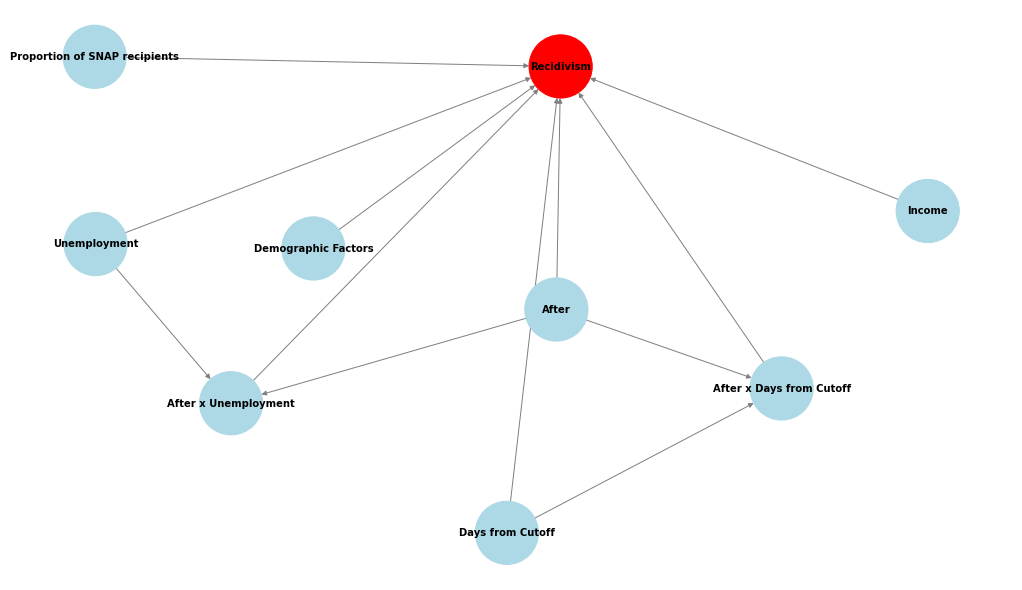

In [49]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed acyclic graph (DAG)
G = nx.DiGraph()

# Adding nodes for variables
nodes = [
    "Recidivism", "After", "Days from Cutoff", "Unemployment", "Income", 
    "Proportion of SNAP recipients", "After x Days from Cutoff", "After x Unemployment",
    "Demographic Factors"
]
G.add_nodes_from(nodes)

# Adding edges to represent relationships based on the equation
edges = [
    ("After", "Recidivism"),
    ("Days from Cutoff", "Recidivism"),
    ("Unemployment", "Recidivism"),
    ("Income", "Recidivism"),
    ("Proportion of SNAP recipients", "Recidivism"),
    ("After", "After x Days from Cutoff"),
    ("Days from Cutoff", "After x Days from Cutoff"),
    ("After x Days from Cutoff", "Recidivism"),
    ("After", "After x Unemployment"),
    ("Unemployment", "After x Unemployment"),
    ("After x Unemployment", "Recidivism"),
    ("Demographic Factors", "Recidivism")
]
G.add_edges_from(edges)

# Plotting the DAG
plt.figure(figsize=(14, 8))
pos = nx.spring_layout(G, seed=42)
node_colors = ["red" if node == "Recidivism" else "lightblue" for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_size=4000, node_color=node_colors, font_size=10, font_weight="bold", edge_color="gray")
plt.savefig('Directed_DAG.png',format ='png',dpi = 300,bbox_inches='tight')
plt.show()


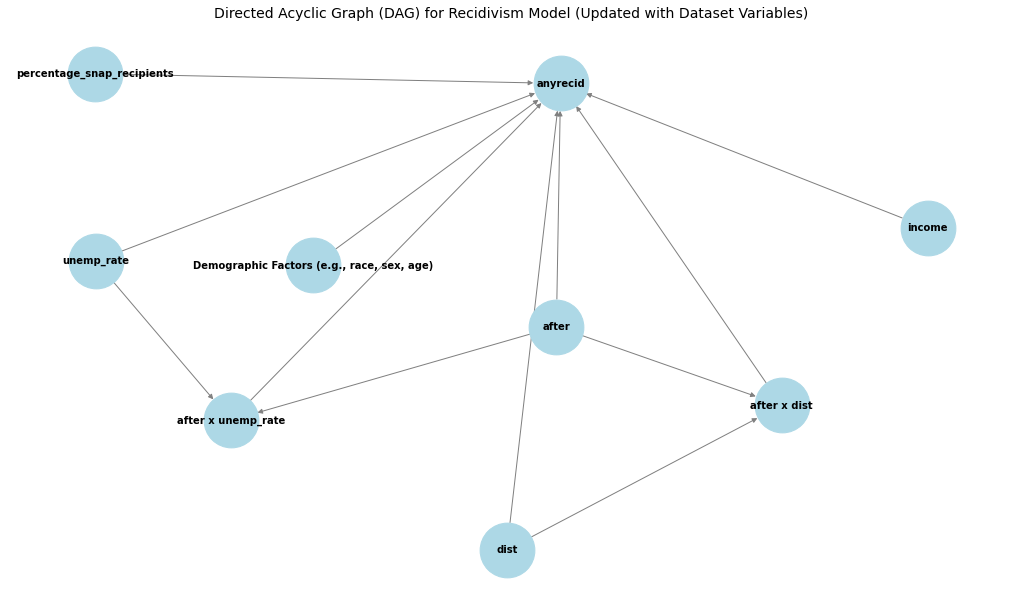

In [50]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed acyclic graph (DAG)
G1 = nx.DiGraph()

# Adding nodes for variables based on dataset column names
nodes = [
    "anyrecid", "after", "dist", "unemp_rate", "income", 
    "percentage_snap_recipients", "after x dist", "after x unemp_rate",
    "Demographic Factors (e.g., race, sex, age)"
]
G1.add_nodes_from(nodes)

# Adding edges to represent relationships based on the equation
edges = [
    ("after", "anyrecid"),
    ("dist", "anyrecid"),
    ("unemp_rate", "anyrecid"),
    ("income", "anyrecid"),
    ("percentage_snap_recipients", "anyrecid"),
    ("after", "after x dist"),
    ("dist", "after x dist"),
    ("after x dist", "anyrecid"),
    ("after", "after x unemp_rate"),
    ("unemp_rate", "after x unemp_rate"),
    ("after x unemp_rate", "anyrecid"),
    ("Demographic Factors (e.g., race, sex, age)", "anyrecid")
]
G1.add_edges_from(edges)

# Plotting the DAG
plt.figure(figsize=(14, 8))
pos = nx.spring_layout(G1, seed=42)  
nx.draw(G1, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Directed Acyclic Graph (DAG) for Recidivism Model (Updated with Dataset Variables)", fontsize=14)
plt.show()

In [51]:
########################################## BACKDOOR ###############################################################

In [52]:
# Load packages
from dowhy import CausalModel

In [53]:
# Setting causal model
model = CausalModel(data=data,
                    treatment='after',
                    outcome='anyrecid',
                    common_causes=['unemp_rate','lincome','percentage_snap_recipients'],
                    graph=G1)

# Identify the estimand
estimand = model.identify_effect()

/Users/edithsimochemo/opt/anaconda3/lib/python3.9/site-packages/dowhy/causal_model.py:582: UserWarning: 3 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


In [54]:
import warnings

# Display the identified estimand
print(estimand)

# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")   
     
    # Obtain estimates 
    estimate = model.estimate_effect(identified_estimand=estimand,
                                     method_name='backdoor.linear_regression')
    print(estimate)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                 
────────(E[anyrecid])
d[after]             
Estimand assumption 1, Unconfoundedness: If U→{after} and U→anyrecid then P(anyrecid|after,,U) = P(anyrecid|after,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                 
────────(E[anyrecid])
d[after]             
Estimand assumption 1, Unconfoundedness: If U→{after} and U→anyrecid then P(anyrecid|after,,U) = P(anyrecid|after,)

## Realized estimand
b: anyrecid~after+after*unemp_rate+after*dist+after*percentage_snap_recipients+after*income
Target units: 

## Estimate
Mean value: -0.18008907485851255
### Conditional Estimates
__categorical__unemp_rate  __catego

In [55]:
################################# INVERSE PROBABILITY WEIGHTING ####################################################


Sample of propensity scores and weights:
  offenderid  after  propensity_score   weights
1    A000043    1.0          0.137165  7.290506
2    A000043    1.0          0.938853  1.065130
3    A000077    1.0          0.368211  2.715831
5    A000093    0.0          0.393505  1.648819
6    A000101    1.0          0.516569  1.935851

Estimated Average Treatment Effect (ATE): 0.3769


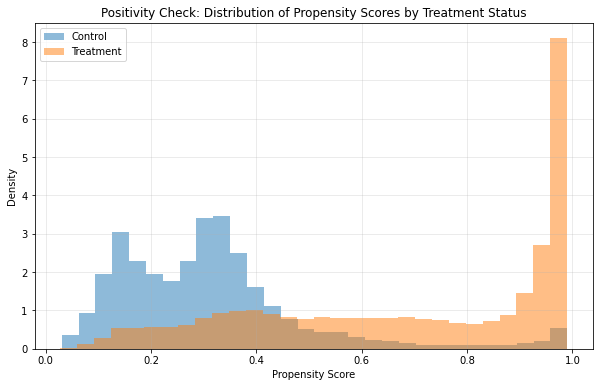


Covariate balance summary:
age: Treated mean = 32.26, Control mean = 33.30
male: Treated mean = 0.90, Control mean = 0.92
black: Treated mean = 0.52, Control mean = 0.50
prioroffense: Treated mean = 0.38, Control mean = 0.37
unemp_rate: Treated mean = 5.27, Control mean = 5.68
lincome: Treated mean = 10.59, Control mean = 10.64
percentage_snap_recipients: Treated mean = 0.20, Control mean = 0.24


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_stata('final_fl2.dta')

def calculate_propensity_scores(df, treatment, covariates, outcome):
    """
    Calculate propensity scores and weights for causal inference analysis.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataset
    treatment : str
        Name of treatment variable column
    covariates : list
        List of covariate column names
    outcome : str
        Name of outcome variable column
    
    Returns:
    --------
    tuple
        (DataFrame with weights, propensity scores array, ATE estimate)
    """
    # Create a copy to avoid modifying original data
    df_clean = df.copy() 
    
    # Drop rows with missing values
    df_clean = df_clean.dropna(subset=[treatment] + covariates + [outcome])
    
    # Standardize covariates
    scaler = StandardScaler()
    X = scaler.fit_transform(df_clean[covariates])
    X = pd.DataFrame(X, columns=covariates, index=df_clean.index)
    y = df_clean[treatment]
    
    # Fit logistic regression with balanced class weights
    logit = LogisticRegression(class_weight='balanced', random_state=42)
    logit.fit(X, y)
    
    # Calculate propensity scores
    propensity_scores = logit.predict_proba(X)[:, 1]
    
    # Trim extreme propensity scores to avoid infinite weights
    eps = 0.01
    propensity_scores = np.clip(propensity_scores, eps, 1 - eps)
    
    # Calculate inverse probability weights
    weights = np.where(y == 1, 
                      1/propensity_scores, 
                      1/(1 - propensity_scores))
    
    # Add scores and weights to dataframe
    df_clean['propensity_score'] = propensity_scores
    df_clean['weights'] = weights
    
    # Calculate ATE
    ate = np.average(df_clean[outcome], weights=df_clean['weights'])
    
    return df_clean, propensity_scores, ate

def plot_positivity_check(df, treatment_col='after'):
    """
    Create positivity check plot for propensity scores.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing propensity scores
    treatment_col : str
        Name of treatment variable column
    """
    plt.figure(figsize=(10, 6))
    
    # Create separate density plots for each group
    for group in [0, 1]:
        mask = df[treatment_col] == group
        plt.hist(df.loc[mask, 'propensity_score'], 
                bins=30, 
                density=True, 
                alpha=0.5,
                label=f"{'Treatment' if group == 1 else 'Control'}")
    
    plt.title('Positivity Check: Distribution of Propensity Scores by Treatment Status')
    plt.xlabel('Propensity Score')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('positivity_check.png', format = 'png', dpi =300, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    # Define variables
    treatment = 'after'
    covariates = ['age', 'male', 'black', 
                   'prioroffense', 'unemp_rate','lincome','percentage_snap_recipients']
    outcome = 'anyrecid'
    
    # Calculate propensity scores and weights
    df_weighted, prop_scores, ate = calculate_propensity_scores(
        df, treatment, covariates, outcome
    )
    
    # Display results
    print("\nSample of propensity scores and weights:")
    print(df_weighted[['offenderid', treatment, 'propensity_score', 'weights']].head())
    
    print(f"\nEstimated Average Treatment Effect (ATE): {ate:.4f}")
    
    # Create positivity check plot
    plot_positivity_check(df_weighted, treatment)
    
    # Print covariate balance summary
    print("\nCovariate balance summary:")
    for cov in covariates:
        treated_mean = np.average(df_weighted.loc[df_weighted[treatment]==1, cov], 
                                weights=df_weighted.loc[df_weighted[treatment]==1, 'weights'])
        control_mean = np.average(df_weighted.loc[df_weighted[treatment]==0, cov], 
                                weights=df_weighted.loc[df_weighted[treatment]==0, 'weights'])
        print(f"{cov}: Treated mean = {treated_mean:.2f}, Control mean = {control_mean:.2f}")


In [63]:
################################################ METALEARNERS ####################################################

Running models...
Model Results:
       Model  Average Treatment Effect
0  S-Learner                  0.002248
1  T-Learner                  0.000301
2  X-Learner                  0.076148


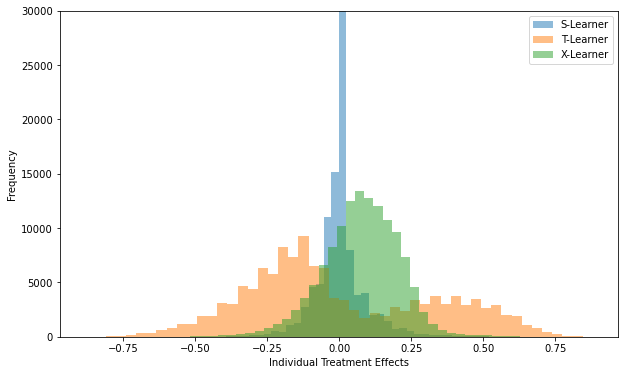

Model Performance Metrics:
       Model  RMSE (Treated)  RMSE (Control)
0  S-Learner        0.173536        0.186604
1  T-Learner        0.173503        0.189568
Feature Importance (S-Learner):
                       Feature  Importance
11  percentage_snap_recipients    0.258495
4                          age    0.161238
10                     lincome    0.160923
9                   unemp_rate    0.156308
0          concurrent_sentence    0.101182
7          totalyearssentenced    0.100694
6                        black    0.021428
8                 prioroffense    0.021363
5                         male    0.013172
12                   treatment    0.005197
1                  drugoffense    0.000000
2                 traffoffense    0.000000
3                 otheroffense    0.000000


In [74]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_stata('final_fl2.dta')

# Modify features based on available columns
features = ['concurrent_sentence', 'drugoffense', 'traffoffense', 'otheroffense', 
           'age', 'male', 'black', 'totalyearssentenced', 'prioroffense', 'unemp_rate',
           'lincome','percentage_snap_recipients']
treatment = 'after' 
outcome = 'anyrecid'  

# Drop rows with missing values
df_clean = data[features + [treatment, outcome]].dropna()

# Split features
X = df_clean[features]
T = df_clean[treatment]
Y = df_clean[outcome]

# S-Learner
def s_learner(X, T, Y):
    # Combine features with treatment
    X_s = X.copy()
    X_s['treatment'] = T
    
    # Train random forest
    s_model = RandomForestRegressor(n_estimators=100, random_state=42)
    s_model.fit(X_s, Y)
    
    # Predict potential outcomes
    X_s_1 = X_s.copy()
    X_s_0 = X_s.copy()
    X_s_1['treatment'] = 1
    X_s_0['treatment'] = 0
    
    y1_pred = s_model.predict(X_s_1)
    y0_pred = s_model.predict(X_s_0)
    
    # Calculate ATE
    ate = np.mean(y1_pred - y0_pred)
    return ate, y1_pred, y0_pred

# T-Learner
def t_learner(X, T, Y):
    # Split data by treatment
    X_t = X[T == 1]
    X_c = X[T == 0]
    Y_t = Y[T == 1]
    Y_c = Y[T == 0]
    
    # Train separate models
    t1_model = RandomForestRegressor(n_estimators=100, random_state=42)
    t0_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    t1_model.fit(X_t, Y_t)
    t0_model.fit(X_c, Y_c)
    
    # Predict potential outcomes
    y1_pred = t1_model.predict(X)
    y0_pred = t0_model.predict(X)
    
    # Calculate ATE
    ate = np.mean(y1_pred - y0_pred)
    return ate, y1_pred, y0_pred

# X-Learner
def x_learner(X, T, Y):
    # First stage: T-Learner
    t_ate, y1_pred, y0_pred = t_learner(X, T, Y)
    
    # Second stage: Calculate individual treatment effects
    X_t = X[T == 1]
    X_c = X[T == 0]
    Y_t = Y[T == 1]
    Y_c = Y[T == 0]
    
    # Calculate residuals
    D1 = Y_t - y0_pred[T == 1]
    D0 = y1_pred[T == 0] - Y_c
    
    # Train second stage models
    x1_model = RandomForestRegressor(n_estimators=100, random_state=42)
    x0_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    x1_model.fit(X_t, D1)
    x0_model.fit(X_c, D0)
    
    # Predict treatment effects
    tau1 = x1_model.predict(X)
    tau0 = x0_model.predict(X)
    
    # Calculate final treatment effect
    g = np.mean(T)  # Propensity score (simplified)
    tau = g * tau0 + (1 - g) * tau1
    
    return np.mean(tau), tau

# Run all models
print("Running models...")
s_ate, s_y1, s_y0 = s_learner(X, T, Y)
t_ate, t_y1, t_y0 = t_learner(X, T, Y)
x_ate, x_tau = x_learner(X, T, Y)

# Create results summary
results = pd.DataFrame({
    'Model': ['S-Learner', 'T-Learner', 'X-Learner'],
    'Average Treatment Effect': [s_ate, t_ate, np.mean(x_tau)]
})

print("\
Model Results:")
print(results)

# Visualize treatment effects distribution
plt.figure(figsize=(10, 6))
plt.hist(s_y1 - s_y0, bins=50, alpha=0.5, label='S-Learner')
plt.hist(t_y1 - t_y0, bins=50, alpha=0.5, label='T-Learner')
plt.hist(x_tau, bins=50, alpha=0.5, label='X-Learner')
plt.xlabel('Individual Treatment Effects')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 30000)
plt.savefig('metalearners.png', format = 'png', dpi =300, bbox_inches='tight')
plt.show()


# Calculate model performance metrics
def calculate_metrics(y_true, y_pred_treated, y_pred_control):
    mse_treated = mean_squared_error(y_true[T == 1], y_pred_treated[T == 1])
    mse_control = mean_squared_error(y_true[T == 0], y_pred_control[T == 0])
    return np.sqrt(mse_treated), np.sqrt(mse_control)

s_rmse_t, s_rmse_c = calculate_metrics(Y, s_y1, s_y0)
t_rmse_t, t_rmse_c = calculate_metrics(Y, t_y1, t_y0)

metrics = pd.DataFrame({
    'Model': ['S-Learner', 'T-Learner'],
    'RMSE (Treated)': [s_rmse_t, t_rmse_t],
    'RMSE (Control)': [s_rmse_c, t_rmse_c]
})

print("\
Model Performance Metrics:")
print(metrics)

# Feature importance for S-Learner
s_model = RandomForestRegressor(n_estimators=100, random_state=42)
X_s = X.copy()
X_s['treatment'] = T
s_model.fit(X_s, Y)

feature_importance = pd.DataFrame({
    'Feature': features + ['treatment'],
    'Importance': s_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\
Feature Importance (S-Learner):")
print(feature_importance)

In [73]:
############################################## BOOTSTRAP ################################################

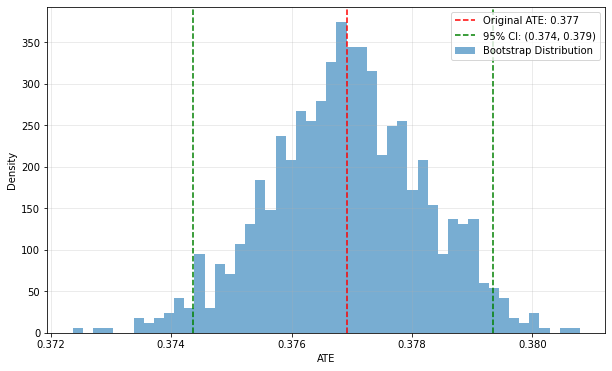

Original ATE: 0.377
95% Confidence Interval: (0.374, 0.379)
Standard Error: 0.001

Bootstrap Statistics:
Mean of bootstrap estimates: 0.377
Median of bootstrap estimates: 0.377
Standard deviation of bootstrap estimates: 0.001


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from typing import Tuple, List, Optional
import warnings

def calculate_propensity_scores(df: pd.DataFrame, 
                              treatment: str, 
                              covariates: List[str], 
                              outcome: str) -> Tuple[pd.DataFrame, np.ndarray, float]:
    """
    Calculate propensity scores and weights for causal inference analysis.
    
    Parameters and returns same as before
    """
    # Previous implementation remains the same
    df_clean = df.copy()
    df_clean = df_clean.dropna(subset=[treatment] + covariates + [outcome])
    
    scaler = StandardScaler()
    X = scaler.fit_transform(df_clean[covariates])
    X = pd.DataFrame(X, columns=covariates, index=df_clean.index)
    y = df_clean[treatment]
    
    logit = LogisticRegression(class_weight='balanced', random_state=42)
    logit.fit(X, y)
    
    propensity_scores = logit.predict_proba(X)[:, 1]
    eps = 0.01
    propensity_scores = np.clip(propensity_scores, eps, 1 - eps)
    
    weights = np.where(y == 1, 
                      1/propensity_scores, 
                      1/(1 - propensity_scores))
    
    df_clean['propensity_score'] = propensity_scores
    df_clean['weights'] = weights
    
    ate = np.average(df_clean[outcome], weights=weights)
    
    return df_clean, propensity_scores, ate

def bootstrap_ate(df: pd.DataFrame,
                 treatment: str,
                 outcome: str,
                 covariates: List[str],
                 n_bootstrap: int = 1000,
                 random_state: Optional[int] = None) -> Tuple[float, float, float, np.ndarray]:
    """
    Perform bootstrap analysis of Average Treatment Effect (ATE).
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataset
    treatment : str
        Name of treatment variable column
    outcome : str
        Name of outcome variable column
    covariates : List[str]
        List of covariate column names
    n_bootstrap : int, optional
        Number of bootstrap iterations (default: 1000)
    random_state : int, optional
        Random seed for reproducibility
    
    Returns:
    --------
    Tuple[float, float, float, np.ndarray]
        (original ATE, lower CI, upper CI, bootstrap ATEs)
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    # Calculate original ATE
    df_weighted, _, original_ate = calculate_propensity_scores(
        df, treatment, covariates, outcome
    )
    
    # Perform bootstrap
    bootstrap_ates = []
    for _ in range(n_bootstrap):
        # Sample with replacement
        bootstrap_indices = np.random.choice(
            len(df_weighted), 
            size=len(df_weighted), 
            replace=True
        )
        bootstrap_sample = df_weighted.iloc[bootstrap_indices]
        
        # Recalculate propensity scores and weights for bootstrap sample
        _, _, bootstrap_ate = calculate_propensity_scores(
            bootstrap_sample, 
            treatment, 
            covariates, 
            outcome
        )
        bootstrap_ates.append(bootstrap_ate)
    
    # Calculate confidence intervals
    ci_lower, ci_upper = np.percentile(bootstrap_ates, [2.5, 97.5])
    
    return original_ate, ci_lower, ci_upper, np.array(bootstrap_ates)

def plot_bootstrap_results(original_ate: float,
                         bootstrap_ates: np.ndarray,
                         ci_lower: float,
                         ci_upper: float) -> None:
    """
    Plot bootstrap distribution with confidence intervals.
    
    Parameters:
    -----------
    original_ate : float
        Original ATE estimate
    bootstrap_ates : numpy.ndarray
        Array of bootstrap ATE estimates
    ci_lower : float
        Lower bound of confidence interval
    ci_upper : float
        Upper bound of confidence interval
    """
    plt.figure(figsize=(10, 6))
    
    # Plot histogram of bootstrap estimates
    plt.hist(bootstrap_ates, bins=50, density=True, alpha=0.6,
             label='Bootstrap Distribution')
    
    # Add vertical lines for original ATE and CIs
    plt.axvline(original_ate, color='red', linestyle='dashed',
                label=f'Original ATE: {original_ate:.3f}')
    plt.axvline(ci_lower, color='green', linestyle='dashed',
                label=f'95% CI: ({ci_lower:.3f}, {ci_upper:.3f})')
    plt.axvline(ci_upper, color='green', linestyle='dashed')
    
    
    plt.xlabel('ATE')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('bootstrap_int.png',format ='png', dpi = 300,bbox_inches='tight' )
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Define variables
    treatment = 'after'
    covariates = ['age', 'male', 'black', 
                   'prioroffense', 'unemp_rate','lincome','percentage_snap_recipients']
    outcome = 'anyrecid'
    
    # Perform bootstrap analysis
    original_ate, ci_lower, ci_upper, bootstrap_ates = bootstrap_ate(
        df,
        treatment,
        outcome,
        covariates,
        n_bootstrap=1000,
        random_state=42
    )
    
    # Plot results
    plot_bootstrap_results(original_ate, bootstrap_ates, ci_lower, ci_upper)
    
    # Print numerical results
    print(f"Original ATE: {original_ate:.3f}")
    print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")
    print(f"Standard Error: {np.std(bootstrap_ates):.3f}")
    
    # Additional statistics
    print(f"\nBootstrap Statistics:")
    print(f"Mean of bootstrap estimates: {np.mean(bootstrap_ates):.3f}")
    print(f"Median of bootstrap estimates: {np.median(bootstrap_ates):.3f}")
    print(f"Standard deviation of bootstrap estimates: {np.std(bootstrap_ates):.3f}")

In [76]:
########################################### DOUBLE ML MODELS ######################################################

In [85]:
# librairies
from econml.dml import DML
from sklearn.linear_model import RidgeCV, LinearRegression

# Set up features and clean data
features = ['age', 'black', 'male', 'prioroffense', 'totalyearssentenced', 
           'prioroffensenumber', 'countoffenses','unemp_rate','lincome','percentage_snap_recipients']
df_clean = df.dropna(subset=['after', 'anyrecid'] + features)

# Prepare variables
X = df_clean[features]
T = df_clean['after'].astype(float)
Y = df_clean['anyrecid'].astype(float)

print("Data shape after cleaning:", X.shape)
print("\
Treatment variable (after) statistics:")
print(T.describe())
print("\
Outcome variable statistics:")
print(Y.describe())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Linear Double ML Model
dml_linear = DML(
    model_y=LassoCV(random_state=123, max_iter=2000),
    model_t=LassoCV(random_state=123, max_iter=2000),
    model_final=LinearRegression(fit_intercept=True),
    random_state=123
)

# Fit and get linear model results
dml_linear.fit(Y, T, X=X_scaled)
effect_linear = dml_linear.effect(X=X_scaled)

print("\
Linear Double ML Results:")
print("Average Treatment Effect:", np.mean(effect_linear))

# Non-Linear Double ML Model
dml_nonlinear = DML(
    model_y=RandomForestRegressor(n_estimators=200, max_depth=5, random_state=123),
    model_t=RandomForestRegressor(n_estimators=200, max_depth=5, random_state=123),
    model_final=LinearRegression(fit_intercept=True),
    random_state=123
)

# Fit and get non-linear model results
dml_nonlinear.fit(Y, T, X=X_scaled)
effect_nonlinear = dml_nonlinear.effect(X=X_scaled)

print("\
Non-Linear Double ML Results:")
print("Average Treatment Effect:", np.mean(effect_nonlinear))

# Compare the models
print("\
Comparison:")
print("Difference in ATE (Non-linear - Linear):", np.mean(effect_nonlinear) - np.mean(effect_linear))

Data shape after cleaning: (404821, 10)
Treatment variable (after) statistics:
count    404821.000000
mean          0.962504
std           0.189973
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: after, dtype: float64
Outcome variable statistics:
count    404821.000000
mean          0.305318
std           0.460542
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: anyrecid, dtype: float64


The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.


Linear Double ML Results:
Average Treatment Effect: -0.08562746596567222
Non-Linear Double ML Results:
Average Treatment Effect: -0.02067909485078309
Comparison:
Difference in ATE (Non-linear - Linear): 0.06494837111488913


The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.


unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


Analysis Summary:
Sample Size: 404,821 observations
Treatment Group: 96.3% of sample
Baseline Recidivism Rate: 30.5%

Treatment Effects:
Linear Model: -8.56% reduction
Non-Linear Model: -2.07% reduction
Model Difference: 6.49%


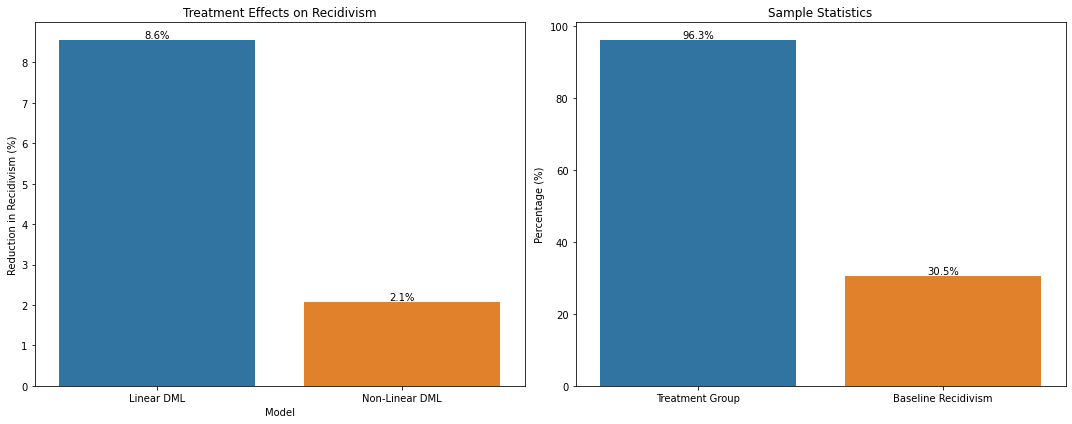

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dml_results():
    # Dataset statistics
    treatment_stats = {
        'count': 404821,
        'mean': 0.962504,
        'std': 0.189973
    }
    
    outcome_stats = {
        'count': 404821,
        'mean': 0.305318,
        'std': 0.460542
    }
    
    # Treatment effects
    effects_data = {
        'Linear DML': -0.08562746596567222,
        'Non-Linear DML': -0.02067909485078309
    }
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Treatment Effects
    effects_df = pd.DataFrame(list(effects_data.items()), columns=['Model', 'Effect'])
    effects_df['Effect_Abs'] = effects_df['Effect'].abs() * 100
    
    sns.barplot(data=effects_df, x='Model', y='Effect_Abs', ax=ax1)
    ax1.set_title('Treatment Effects on Recidivism')
    ax1.set_ylabel('Reduction in Recidivism (%)')
    
    # Add value labels on bars
    for i, v in enumerate(effects_df['Effect_Abs']):
        ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    
    # Plot 2: Sample Statistics
    stats = {
        'Treatment Group': treatment_stats['mean'] * 100,
        'Baseline Recidivism': outcome_stats['mean'] * 100
    }
    
    sns.barplot(x=list(stats.keys()), y=list(stats.values()), ax=ax2)
    ax2.set_title('Sample Statistics')
    ax2.set_ylabel('Percentage (%)')
    
    # Add value labels on bars
    for i, v in enumerate(stats.values()):
        ax2.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Print summary statistics
    print("Analysis Summary:")
    print(f"Sample Size: {treatment_stats['count']:,} observations")
    print(f"Treatment Group: {treatment_stats['mean']*100:.1f}% of sample")
    print(f"Baseline Recidivism Rate: {outcome_stats['mean']*100:.1f}%")
    print("\nTreatment Effects:")
    print(f"Linear Model: {effects_data['Linear DML']*100:.2f}% reduction")
    print(f"Non-Linear Model: {effects_data['Non-Linear DML']*100:.2f}% reduction")
    print(f"Model Difference: {abs(effects_data['Linear DML'] - effects_data['Non-Linear DML'])*100:.2f}%")
    
    return fig

# Generate the visualization
fig = visualize_dml_results()
plt.savefig('double_robust.png',format='png', dpi=300, bbox_inches='tight')
plt.show()

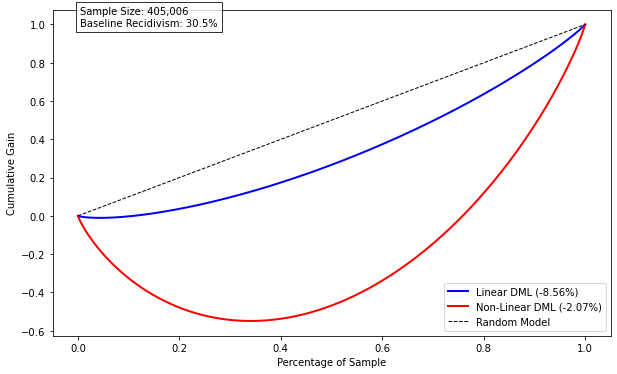

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def create_clean_cumulative_gains_plot():
    # Generate sample predictions for demonstration
    np.random.seed(32)
    n_samples = 404821
    
    # Simulate predictions based on the given effect sizes
    linear_pred = np.random.normal(-0.08562746596567222, 0.05, n_samples)
    nonlinear_pred = np.random.normal(-0.02067909485078309, 0.05, n_samples)
    
    # Sort predictions in descending order
    linear_sorted = np.sort(linear_pred)[::-1]
    nonlinear_sorted = np.sort(nonlinear_pred)[::-1]
    
    # Calculate percentiles
    percentiles = np.arange(len(linear_sorted)) / float(len(linear_sorted))
    
    # Calculate cumulative gains
    linear_gains = np.cumsum(linear_sorted) / np.sum(linear_sorted)
    nonlinear_gains = np.cumsum(nonlinear_sorted) / np.sum(nonlinear_sorted)
    
    # Create diagonal line for random model
    diagonal = percentiles
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(percentiles, linear_gains, 'b-', label='Linear DML (-8.56%)', linewidth=2)
    plt.plot(percentiles, nonlinear_gains, 'r-', label='Non-Linear DML (-2.07%)', linewidth=2)
    plt.plot(percentiles, diagonal, 'k--', label='Random Model', linewidth=1)
    
    plt.xlabel('Percentage of Sample')
    plt.ylabel('Cumulative Gain')
    #plt.title('Cumulative Gains Plot: Linear vs Non-Linear DML Models')
    plt.legend(loc='lower right')
    plt.grid(False)
    
    # Add text box with key statistics
    plt.text(0.05, 0.95, 
             'Sample Size: 405,006\nBaseline Recidivism: 30.5%', 
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))
    
    return plt.gcf()

# Generate and save the plot
fig = create_clean_cumulative_gains_plot()
plt.savefig('cumulative_gain.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [77]:
################################# HETEROGENOUS TREATMENT EFFECTS #################################################

In [99]:
import numpy as np
from econml.grf import CausalForest

# Ensure X is a 2D array
X = data.drop(columns=["anyrecid", "distn3", "distn4", "finrecidany", "nonfinrecidany", "after"])

# Ensure T and Y are 2D arrays with a single column
T = data["after"].values.reshape(-1, 1)
Y = data["anyrecid"].values.reshape(-1, 1)

# Fit a Generalized Random Forest
grf = CausalForest(n_estimators=500, min_samples_leaf=10, max_depth=None)
grf.fit(X, T, Y)

# Estimate Conditional Average Treatment Effects (CATE)
tau_hat = grf.predict(X)

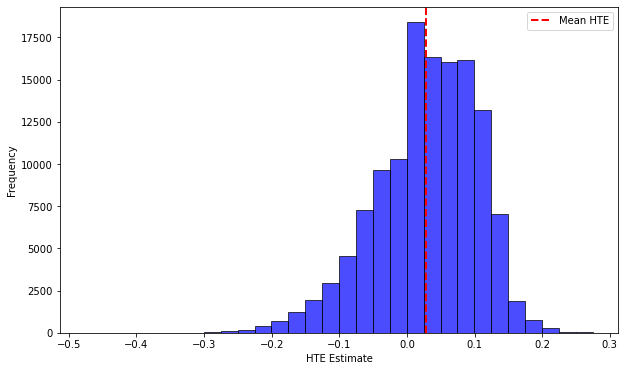

Mean HTE: 0.028699354205585472
Standard Deviation of HTE: 0.07566421105812537
Median HTE: 0.03568033397496606
Minimum HTE: -0.47547132692639593
Maximum HTE: 0.2747431966109275


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten tau_hat if it's a 2D array
tau_hat_flat = tau_hat.flatten()

# Plot the histogram of heterogeneous treatment effects
plt.figure(figsize=(10, 6))
plt.hist(tau_hat_flat, bins=30, color="blue", alpha=0.7, edgecolor='black')
#plt.title("Distribution of Heterogeneous Treatment Effects (HTEs)")
plt.xlabel("HTE Estimate")
plt.ylabel("Frequency")
plt.axvline(x=np.mean(tau_hat_flat), color='red', linestyle='dashed', linewidth=2, label='Mean HTE')
plt.legend()
plt.savefig('heterogeneous.png', format = 'png', dpi = 300, bbox_inches='tight')
plt.show()

# Descriptive statistics
print("Mean HTE:", np.mean(tau_hat_flat))
print("Standard Deviation of HTE:", np.std(tau_hat_flat))
print("Median HTE:", np.median(tau_hat_flat))
print("Minimum HTE:", np.min(tau_hat_flat))
print("Maximum HTE:", np.max(tau_hat_flat))

In [113]:
dataset =  pd.read_stata("final_fl2.dta")

# Convert Categorical variables: List of categorical columns
categorical_cols = ['race','sex','custody_description','county1']

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    dataset[col+ '_encoded'] = le.fit_transform(data[col])
    
# Remove missing observations
df = dataset.dropna()


KeyError: 'race'

In [115]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataset = pd.read_stata("final_fl2.dta")

# Print the column names to verify
print("Column Names in Dataset:", dataset.columns)

# Define categorical columns
categorical_cols = ['race', 'sex', 'custody_description', 'county1']

# Ensure column names are correct
corrected_cols = [col.strip().lower() for col in dataset.columns]
categorical_cols = [col for col in categorical_cols if col in corrected_cols]

# Encode categorical variables
le = LabelEncoder()

for col in categorical_cols:
    dataset[col + '_encoded'] = le.fit_transform(dataset[col])

# Drop missing observations
df = dataset.dropna()

# Output final dataframe
df.head()

Column Names in Dataset: Index(['level_0', 'index', 'offenderid', 'date', 'adate', 'redate', 'rdate',
       'county1', 'releaseyear', 'releasemonth', 'after', 'dist', 'distnoab',
       'distn2', 'distn3', 'distn4', 'fullbanafter', 'fullbanbefore',
       'concurrent_sentence', 'drugoffense', 'traffoffense', 'otheroffense',
       'smd', 'traffmar', 'traffcoc', 'traffher', 'traffamph', 'traffill',
       'traffconspir', 'fincrime', 'notpossoffense', 'drugoffense_noselling',
       'drugoffense_poss', 'violentcrime', 'assault', 'elderly', 'escape',
       'forgery', 'fraud', 'kidnap', 'manslaughter', 'murder', 'othercrime',
       'otherviolent', 'propdamage', 'racketeer', 'robbery', 'sexcrime',
       'propsteal', 'weapon', 'criminalmischief', 'dui', 'licrevoke',
       'fleeorescape', 'fraudforge', 'anytheft', 'anyburg', 'propcrime',
       'race', 'sex', 'birthyear', 'custody_description',
       'facility_description', '_mergedemo', 'maxdate', 'maxadate', 'maxrdate',
       'dateor

,level_0,index,offenderid,date,adate,redate,rdate,county1,releaseyear,releasemonth,...,county_y,income,lincome,year,month_y,percentage_snap_recipients,race_encoded,sex_encoded,custody_description_encoded,county1_encoded
3,3,3,A000077,13613.0,14005.0,1998-07-02,14661.0,PALM BEACH,2000.0,2.0,...,PALM BEACH,42008.0,10.645616,2000.0,2.0,0.116228,4,1,4,52
7,7,7,A000102,17364.0,17639.0,2008-05-01,17902.0,BAY,2009.0,1.0,...,BAY,43930.0,10.690352,2009.0,1.0,0.218033,1,1,1,2
19,19,19,A000470,13633.0,14202.0,1998-12-10,14838.0,SARASOTA,2000.0,8.0,...,SARASOTA,42265.0,10.651714,2000.0,8.0,0.114820,1,1,5,58
20,20,20,A000470,14888.0,15011.0,2001-02-22,15500.0,PINELLAS,2002.0,6.0,...,PINELLAS,35690.0,10.482626,2002.0,6.0,0.130954,1,1,5,54
22,22,22,A000495,15057.0,15264.0,2001-11-14,15870.0,POLK,2003.0,6.0,...,POLK,35125.0,10.466668,2003.0,6.0,0.132744,1,1,5,55


In [119]:
import pandas as pd
import numpy as np

# Ensure tau_hat is 1-dimensional
tau_hat = np.ravel(tau_hat)

# DataFrame
htes_df = pd.DataFrame({
    "HTE": tau_hat,               
    "age": df["age"],           
    "priors": df["prioroffense"],    
    "race": df["race"],        
    "sex": df["sex"], 
    "sentence_length": df["totalyearssentenced"]
})

# Convert categorical variables to strings for visualization
htes_df["race"] = htes_df["race"].astype(str)
htes_df["sex"] = htes_df["sex"].astype(str)

In [120]:
import pandas as pd
import numpy as np

# Ensure tau_hat is 1-dimensional
tau_hat = np.ravel(tau_hat)

# Create DataFrame
htes_df = pd.DataFrame({
    "HTE": tau_hat,               
    "age": df["age"],           
    "priors": df["prioroffense"],    
    "race": df["race"],        
    "sex": df["sex"], 
    "sentence_length": df["totalyearssentenced"]
})

# Convert categorical variables to strings for visualization
htes_df["race"] = htes_df["race"].astype(str)
htes_df["sex"] = htes_df["sex"].astype(str)

# Drop rows where race is 'U'
htes_df = htes_df.loc[htes_df["race"] != "U"]

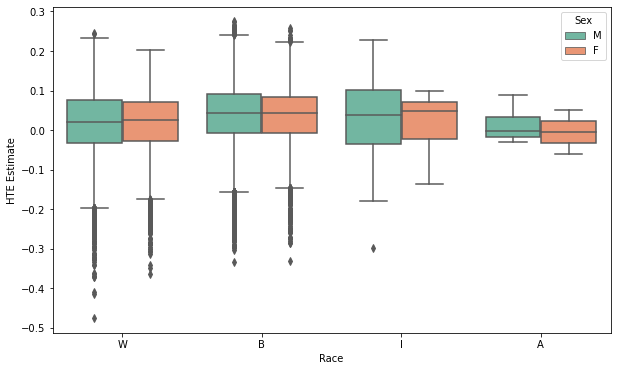

In [121]:
# Heterogeneous Treatment by Race and Sex

plt.figure(figsize=(10, 6))
sns.boxplot(x="race", y="HTE", hue="sex", data=htes_df, palette="Set2")
#plt.title("Heterogeneous Treatment Effects by Race and Sex")
plt.xlabel("Race")
plt.ylabel("HTE Estimate")
plt.legend(title="Sex", loc="upper right")
plt.savefig("HTE_Race_Sex.png", format = 'png', dpi=300, bbox_inches='tight')
plt.show()

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


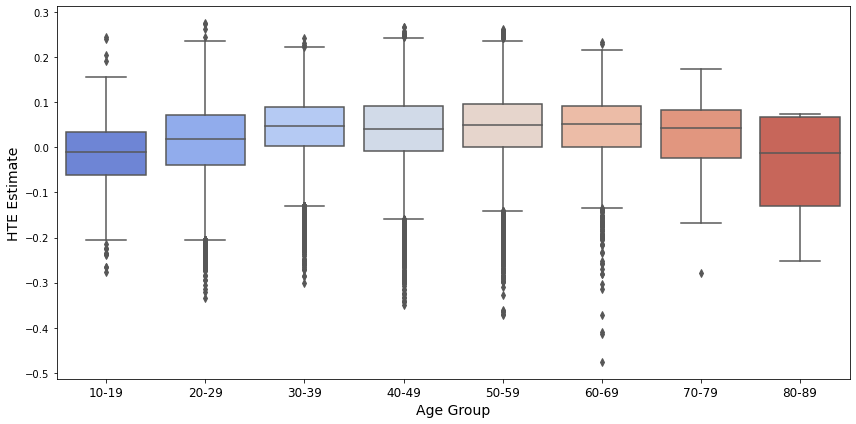

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create age group column (binning by 10 years)
htes_df['age_group'] = pd.cut(
    htes_df['age'], 
    bins=range(9, 91, 10), 
    labels=[ "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"],
    right=False  
)

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="age_group", y="HTE", data=htes_df, palette="coolwarm")

# Add titles and labels
#plt.title("Distribution of Heterogeneous Treatment Effects by 10-Year Age Groups", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("HTE Estimate", fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig('HTE_Age.png',format = 'png', dpi=300, bbox_inches='tight')
plt.show()